#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
%mkdir yolov8

In [ ]:
%cd yolov8

/content/yolov8


In [ ]:
# install dependencies as necessary
# !pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.downloads import attempt_download  # to download models/datasets

# # clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


# Download Correctly Formatted Custom Dataset

We'll download our dataset from Roboflow. Use the "**YOLOv8**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TsqzHhM4Hpar3s384RvS")
project = rf.workspace("computer-vision-xiyu1").project("coral-life-forms-detection")
dataset = project.version(3).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Coral-Life-Forms-Detection-3 in yolov8:: 100%|██████████| 1726/1726 [00:00<00:00, 7369.17it/s]


In [ ]:
%cd /content/yolov8

/content/yolov8


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- Branching
- Encrusting
- Foliose
- Massive
- Mushroom
- Submassive
- Tabulate
nc: 7
roboflow:
  license: CC BY 4.0
  project: coral-life-forms-detection
  url: https://universe.roboflow.com/computer-vision-xiyu1/coral-life-forms-detection/dataset/3
  version: 3
  workspace: computer-vision-xiyu1
test: ../test/images
train: Coral-Life-Forms-Detection-3/train/images
val: Coral-Life-Forms-Detection-3/valid/images


# Define Model Configuration and Architecture

We will write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.

You do not need to edit these cells, but you may.

In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
print(dataset.location)

/content/yolov8/Coral-Life-Forms-Detection-3


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

Transferred 355/355 items from pretrained weights


# Train YOLOv8 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov8/
# !python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache


# Train the YOLOv3 model
dataset_config_path = f'{dataset.location}/data.yaml'  # Replace with your dataset configuration path
training_epochs = 100
image_size = 416
batch_size = 16
seed = 43
device = 0

results = model.train(
    data=dataset_config_path,
    project='yolov8_train',
    epochs=training_epochs,
    imgsz=image_size,
    batch=batch_size,
    device=device,
    seed=seed,
    plots=True
)


/content/yolov8
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/yolov8/Coral-Life-Forms-Detection-3/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=yolov8_train, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=43, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

train: Scanning /content/yolov8/Coral-Life-Forms-Detection-3/train/labels.cache... 791 images, 0 backgrounds, 0 corrupt: 100%|██████████| 791/791 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolov8/Coral-Life-Forms-Detection-3/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]


Plotting labels to yolov8_train/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to yolov8_train/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.34G      1.949      3.979       1.55        111        416: 100%|██████████| 50/50 [00:18<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         33        316     0.0113      0.362     0.0517     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.29G      1.816          3       1.36        133        416: 100%|██████████| 50/50 [00:12<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         33        316      0.261      0.216      0.171      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       1.3G       1.68      2.429      1.313         79        416: 100%|██████████| 50/50 [00:13<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]


                   all         33        316      0.337      0.366      0.248      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.23G       1.64      2.194      1.299        144        416: 100%|██████████| 50/50 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         33        316      0.232       0.35      0.259      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.22G      1.605      2.073      1.271        148        416: 100%|██████████| 50/50 [00:12<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         33        316      0.427      0.377      0.329      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.21G      1.547      1.937      1.248        114        416: 100%|██████████| 50/50 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         33        316      0.354      0.279       0.31      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.22G       1.51      1.838      1.233        109        416: 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


                   all         33        316      0.434      0.366      0.359      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.26G      1.488      1.758      1.213         85        416: 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         33        316      0.614        0.3      0.369      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.26G       1.45      1.692        1.2        114        416: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         33        316      0.513      0.443      0.426      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.23G      1.413      1.669      1.192         68        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         33        316      0.546      0.437      0.461      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.23G      1.392      1.591       1.18         69        416: 100%|██████████| 50/50 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         33        316      0.475      0.467      0.472      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.21G      1.395      1.588      1.181         57        416: 100%|██████████| 50/50 [00:13<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         33        316      0.507      0.445      0.458      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.33G      1.376      1.533      1.165        141        416: 100%|██████████| 50/50 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         33        316      0.581      0.486      0.518      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.25G      1.382      1.504      1.161        106        416: 100%|██████████| 50/50 [00:12<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         33        316      0.562       0.47      0.482      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.18G       1.34      1.457      1.149        110        416: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         33        316      0.503      0.484      0.505      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       1.2G      1.343      1.444      1.147        105        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         33        316      0.648      0.442      0.524       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       1.3G      1.332      1.405       1.14        107        416: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]


                   all         33        316      0.682      0.494      0.547      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.17G      1.305      1.404      1.139         78        416: 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all         33        316      0.647      0.375       0.44      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.28G      1.309      1.349      1.129        133        416: 100%|██████████| 50/50 [00:12<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         33        316       0.68      0.405       0.53      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.2G      1.294      1.329      1.123        109        416: 100%|██████████| 50/50 [00:12<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         33        316      0.705       0.47      0.561      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.21G      1.292      1.341      1.127        138        416: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         33        316      0.601       0.49      0.543      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.21G      1.279      1.296      1.114        119        416: 100%|██████████| 50/50 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         33        316      0.693      0.477      0.521      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.28G      1.281      1.298      1.122        189        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         33        316      0.707      0.495      0.572      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.17G      1.253      1.251      1.108        152        416: 100%|██████████| 50/50 [00:12<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         33        316      0.686      0.456      0.539      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.25G      1.243      1.241      1.107         94        416: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         33        316      0.688      0.484      0.585      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.28G      1.254      1.241      1.099        107        416: 100%|██████████| 50/50 [00:13<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         33        316      0.722      0.505      0.562      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.27G       1.24      1.224      1.102        138        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         33        316      0.696      0.479      0.562      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.24G      1.231      1.186      1.088        123        416: 100%|██████████| 50/50 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         33        316       0.71      0.483      0.563       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.33G      1.245      1.189      1.101         72        416: 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         33        316      0.702      0.472       0.56       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.22G      1.224      1.168      1.085         92        416: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         33        316      0.661      0.524      0.571       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.23G      1.218      1.149      1.088        122        416: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         33        316      0.637      0.522      0.567      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.29G      1.203      1.143       1.08        170        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         33        316      0.708      0.503      0.594        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.27G      1.189      1.124      1.072        101        416: 100%|██████████| 50/50 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         33        316      0.536      0.509      0.542      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.21G      1.194      1.135      1.072        119        416: 100%|██████████| 50/50 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         33        316      0.715      0.516      0.584      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.24G      1.195      1.107      1.077        115        416: 100%|██████████| 50/50 [00:12<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         33        316      0.699      0.573        0.6      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.23G      1.184      1.101      1.064        115        416: 100%|██████████| 50/50 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         33        316      0.792      0.506      0.592      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       1.3G      1.174      1.081      1.059        103        416: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         33        316      0.672      0.513      0.594      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       1.2G      1.178      1.067      1.071        119        416: 100%|██████████| 50/50 [00:12<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         33        316      0.676      0.591      0.626      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.28G      1.171      1.062      1.055         92        416: 100%|██████████| 50/50 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         33        316      0.692       0.55      0.612      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       1.2G      1.145      1.045       1.05        138        416: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         33        316      0.753      0.501      0.595      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.33G      1.159      1.058      1.052         87        416: 100%|██████████| 50/50 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         33        316      0.688      0.538      0.613      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       1.2G       1.13      1.009      1.047         79        416: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         33        316      0.623      0.588      0.618      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.26G      1.129      1.002      1.041        119        416: 100%|██████████| 50/50 [00:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         33        316      0.648        0.6      0.645      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.24G      1.161      1.023      1.054        106        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         33        316      0.689      0.592      0.626      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.23G      1.146      1.003      1.041        116        416: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         33        316      0.766      0.562      0.664      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.22G      1.132     0.9929      1.042         90        416: 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         33        316      0.729      0.539      0.615      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.22G      1.125     0.9832      1.039         96        416: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         33        316      0.767      0.524      0.608      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.21G      1.136     0.9803      1.039        107        416: 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         33        316      0.763      0.555      0.648      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.32G      1.113     0.9554      1.026        119        416: 100%|██████████| 50/50 [00:12<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         33        316      0.757      0.563      0.654      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.17G       1.12     0.9593      1.039        148        416: 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         33        316      0.685      0.581      0.642      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.19G      1.102     0.9445      1.026        141        416: 100%|██████████| 50/50 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         33        316      0.702       0.55      0.626      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.19G      1.102     0.9382      1.022         69        416: 100%|██████████| 50/50 [00:14<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         33        316       0.72      0.526      0.622      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.18G      1.089     0.9182      1.023        131        416: 100%|██████████| 50/50 [00:12<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         33        316      0.676      0.595       0.62      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.21G      1.093     0.9237      1.022        119        416: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         33        316      0.724      0.605      0.675      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       1.3G      1.084     0.9225      1.018        127        416: 100%|██████████| 50/50 [00:12<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         33        316      0.767      0.584      0.668      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.28G       1.06     0.8949      1.011         56        416: 100%|██████████| 50/50 [00:12<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         33        316      0.744      0.549      0.643      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.25G      1.099     0.9222      1.022        115        416: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         33        316      0.734      0.615      0.653      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       1.2G      1.052     0.8823       1.01        138        416: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         33        316      0.791      0.559      0.654      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.28G      1.067     0.9022      1.012        139        416: 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         33        316      0.746      0.546      0.629      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.27G      1.063     0.8849      1.011        129        416: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         33        316      0.747      0.575      0.647      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.24G      1.071     0.8954      1.011        128        416: 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         33        316      0.765      0.603      0.657      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.24G      1.053     0.8676      1.006        135        416: 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         33        316      0.822      0.572      0.672      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.25G      1.043     0.8578      1.006         68        416: 100%|██████████| 50/50 [00:12<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         33        316      0.754      0.593       0.66      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.23G      1.041     0.8453      1.006        135        416: 100%|██████████| 50/50 [00:12<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         33        316      0.816      0.553      0.643      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.24G      1.048     0.8595      1.002        125        416: 100%|██████████| 50/50 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         33        316      0.765      0.575      0.638      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       1.2G      1.047     0.8565      1.003        103        416: 100%|██████████| 50/50 [00:13<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         33        316      0.776      0.566      0.645      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.26G      1.019     0.8259     0.9926         73        416: 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         33        316      0.746      0.552      0.627      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.21G      1.043     0.8416     0.9985         81        416: 100%|██████████| 50/50 [00:12<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         33        316      0.773      0.597      0.672      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.23G      1.006     0.8067     0.9869        108        416: 100%|██████████| 50/50 [00:13<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         33        316      0.735      0.587      0.651      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.28G      1.023      0.816     0.9892         74        416: 100%|██████████| 50/50 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         33        316      0.708      0.582      0.643      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.22G      1.015     0.8074      0.987         85        416: 100%|██████████| 50/50 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         33        316      0.698      0.608      0.649      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.22G      1.022     0.8112     0.9901         99        416: 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         33        316      0.773      0.597      0.668      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.23G      1.004     0.7925     0.9869        112        416: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         33        316      0.731      0.573      0.645      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       1.2G      1.006     0.7954     0.9875         75        416: 100%|██████████| 50/50 [00:12<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         33        316      0.739      0.599      0.648       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.29G      1.005     0.7942     0.9835        102        416: 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         33        316      0.814      0.541      0.651      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.21G     0.9996     0.7899     0.9831        130        416: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         33        316      0.704      0.582      0.644      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.23G     0.9924     0.7894     0.9807        105        416: 100%|██████████| 50/50 [00:12<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         33        316      0.707      0.554      0.631       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.25G     0.9834     0.7675     0.9766        110        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         33        316      0.793      0.555      0.645      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.22G     0.9829     0.7753     0.9781        142        416: 100%|██████████| 50/50 [00:12<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         33        316      0.838      0.552      0.648      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.28G     0.9958     0.7675     0.9813        129        416: 100%|██████████| 50/50 [00:13<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         33        316      0.719      0.574      0.622      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.24G      0.987     0.7723     0.9762        140        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         33        316      0.715      0.596      0.656      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.25G     0.9806     0.7497     0.9794        157        416: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         33        316      0.747      0.601      0.658      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.27G     0.9804     0.7642     0.9791         77        416: 100%|██████████| 50/50 [00:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         33        316      0.795      0.613      0.672      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.19G     0.9762     0.7486     0.9712         65        416: 100%|██████████| 50/50 [00:12<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         33        316      0.703      0.634      0.664      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.26G     0.9655     0.7471     0.9717         83        416: 100%|██████████| 50/50 [00:13<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         33        316       0.82      0.562      0.664      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.22G      0.973     0.7578     0.9733         82        416: 100%|██████████| 50/50 [00:12<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         33        316      0.784      0.598      0.668       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.26G     0.9764     0.7612     0.9774        145        416: 100%|██████████| 50/50 [00:14<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         33        316       0.76      0.613      0.662      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.27G     0.9723     0.7365     0.9699        163        416: 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         33        316      0.815      0.586      0.674      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.26G     0.9695      0.746     0.9656        125        416: 100%|██████████| 50/50 [00:12<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         33        316      0.766      0.595      0.653      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.24G     0.9556     0.7283     0.9703        161        416: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         33        316      0.792       0.59       0.67      0.443


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       1.3G     0.9554     0.7793     0.9585         66        416: 100%|██████████| 50/50 [00:14<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         33        316       0.67      0.603      0.641      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.17G     0.9075     0.6931     0.9449         40        416: 100%|██████████| 50/50 [00:11<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         33        316      0.763      0.557      0.642      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.18G     0.9087     0.6648     0.9363         43        416: 100%|██████████| 50/50 [00:10<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         33        316      0.727      0.586       0.66      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.17G     0.8963      0.659     0.9324         64        416: 100%|██████████| 50/50 [00:11<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         33        316      0.783      0.558      0.661      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.18G     0.8899     0.6358     0.9304         30        416: 100%|██████████| 50/50 [00:11<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all         33        316      0.735      0.593      0.669      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.16G     0.8792     0.6339     0.9231         40        416: 100%|██████████| 50/50 [00:10<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         33        316      0.708      0.615       0.66      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.18G     0.8845     0.6375     0.9286        118        416: 100%|██████████| 50/50 [00:11<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         33        316      0.758      0.588      0.667      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.17G     0.8804     0.6277     0.9291         84        416: 100%|██████████| 50/50 [00:11<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         33        316      0.778      0.584      0.674      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.18G     0.8725     0.6132     0.9236         70        416: 100%|██████████| 50/50 [00:10<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         33        316       0.79      0.564      0.666      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.18G     0.8706     0.6205     0.9269         80        416: 100%|██████████| 50/50 [00:10<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         33        316      0.717      0.615      0.664       0.45



100 epochs completed in 0.387 hours.
Optimizer stripped from yolov8_train/train2/weights/last.pt, 6.2MB
Optimizer stripped from yolov8_train/train2/weights/best.pt, 6.2MB

Validating yolov8_train/train2/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]


                   all         33        316      0.737      0.614      0.654      0.458
             Branching         33         93      0.577      0.688      0.686      0.431
            Encrusting         33         50       0.73      0.596      0.679      0.445
               Foliose         33         11      0.744      0.531      0.534      0.438
               Massive         33         73      0.833      0.438      0.612      0.354
              Mushroom         33         40      0.935      0.722      0.796       0.57
            Submassive         33         18      0.879      0.611      0.755      0.618
              Tabulate         33         31      0.457       0.71       0.52       0.35
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to yolov8_train/train2
CPU times: user 11min 56s, sys: 37.7 s, total: 12min 34s
Wall time: 23min 30s


# Evaluate Custom YOLOv8 Detector Performance

In [ ]:
# Validate the model
metrics_train = model.val(split='train')  # no arguments needed, dataset and settings remembered

print("mAP (50-95):", metrics_train.box.map)
print("mAP50:", metrics_train.box.map50)
print("mAP75:", metrics_train.box.map75)
print("mAPs for each category:", metrics_train.box.maps)

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/yolov8/Coral-Life-Forms-Detection-3/train/labels.cache... 791 images, 0 backgrounds, 0 corrupt: 100%|██████████| 791/791 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.54it/s]


                   all        791       6851      0.898      0.797      0.884      0.668
             Branching        791       1902      0.763      0.879      0.907      0.661
            Encrusting        791        725      0.918      0.828      0.914      0.689
               Foliose        791        267      0.953      0.858      0.921       0.79
               Massive        791       1642      0.929      0.766      0.907      0.661
              Mushroom        791        943      0.965      0.464      0.684      0.441
            Submassive        791        514      0.933      0.946      0.975      0.791
              Tabulate        791        858      0.824      0.839      0.879      0.645
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8_train/train24
mAP (50-95): 0.668349235454693
mAP50: 0.8840077433277042
mAP75: 0.7647913989159495
mAPs for each category: [    0.66101     0.68904     0.78971     0.66084     0.44136 

In [ ]:
# Validate the model
metrics_val = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/yolov8/Coral-Life-Forms-Detection-3/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]


                   all         33        316      0.733      0.615      0.655       0.46
             Branching         33         93      0.579      0.699      0.686      0.434
            Encrusting         33         50       0.71        0.6      0.684      0.446
               Foliose         33         11      0.742      0.526      0.533      0.442
               Massive         33         73       0.83      0.438      0.612      0.355
              Mushroom         33         40      0.935      0.724      0.796       0.58
            Submassive         33         18      0.878      0.611      0.754      0.616
              Tabulate         33         31      0.456       0.71      0.519      0.346
Speed: 0.7ms preprocess, 7.2ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to yolov8_train/train23


In [ ]:
print("mAP (50-95):", metrics_val.box.map)
print("mAP50:", metrics_val.box.map50)
print("mAP75:", metrics_val.box.map75)
print("mAPs for each category:", metrics_val.box.maps)

mAP (50-95): 0.4598165156556784
mAP50: 0.6549528469408187
mAP75: 0.5139317990867724
mAPs for each category: [     0.4341     0.44634     0.44194     0.35451     0.58034     0.61584     0.34565]


In [ ]:
# Validate the model
metrics = model.val(split="test")  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/yolov8/Coral-Life-Forms-Detection-3/test/labels... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 366.85it/s]

val: New cache created: /content/yolov8/Coral-Life-Forms-Detection-3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


                   all         33        288       0.84      0.625       0.75      0.538
             Branching         33         59      0.711      0.695      0.762      0.484
            Encrusting         33         47      0.934      0.766      0.811      0.558
               Foliose         33         21          1      0.536      0.799      0.648
               Massive         33         85      0.772      0.482      0.695      0.438
              Mushroom         33         38      0.946      0.466      0.634      0.455
            Submassive         33         16      0.911       0.75      0.873      0.681
              Tabulate         33         22      0.602      0.682      0.679      0.501
Speed: 0.2ms preprocess, 28.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to yolov8_train/train22


In [ ]:
print("mAP (50-95):", metrics.box.map)
print("mAP50:", metrics.box.map50)
print("mAP75:", metrics.box.map75)
print("mAPs for each category:", metrics.box.maps)

mAP (50-95): 0.5378994340075679
mAP50: 0.7504962708888206
mAP75: 0.6369303282642985
mAPs for each category: [    0.48437     0.55776     0.64837     0.43772     0.45452     0.68113     0.50143]


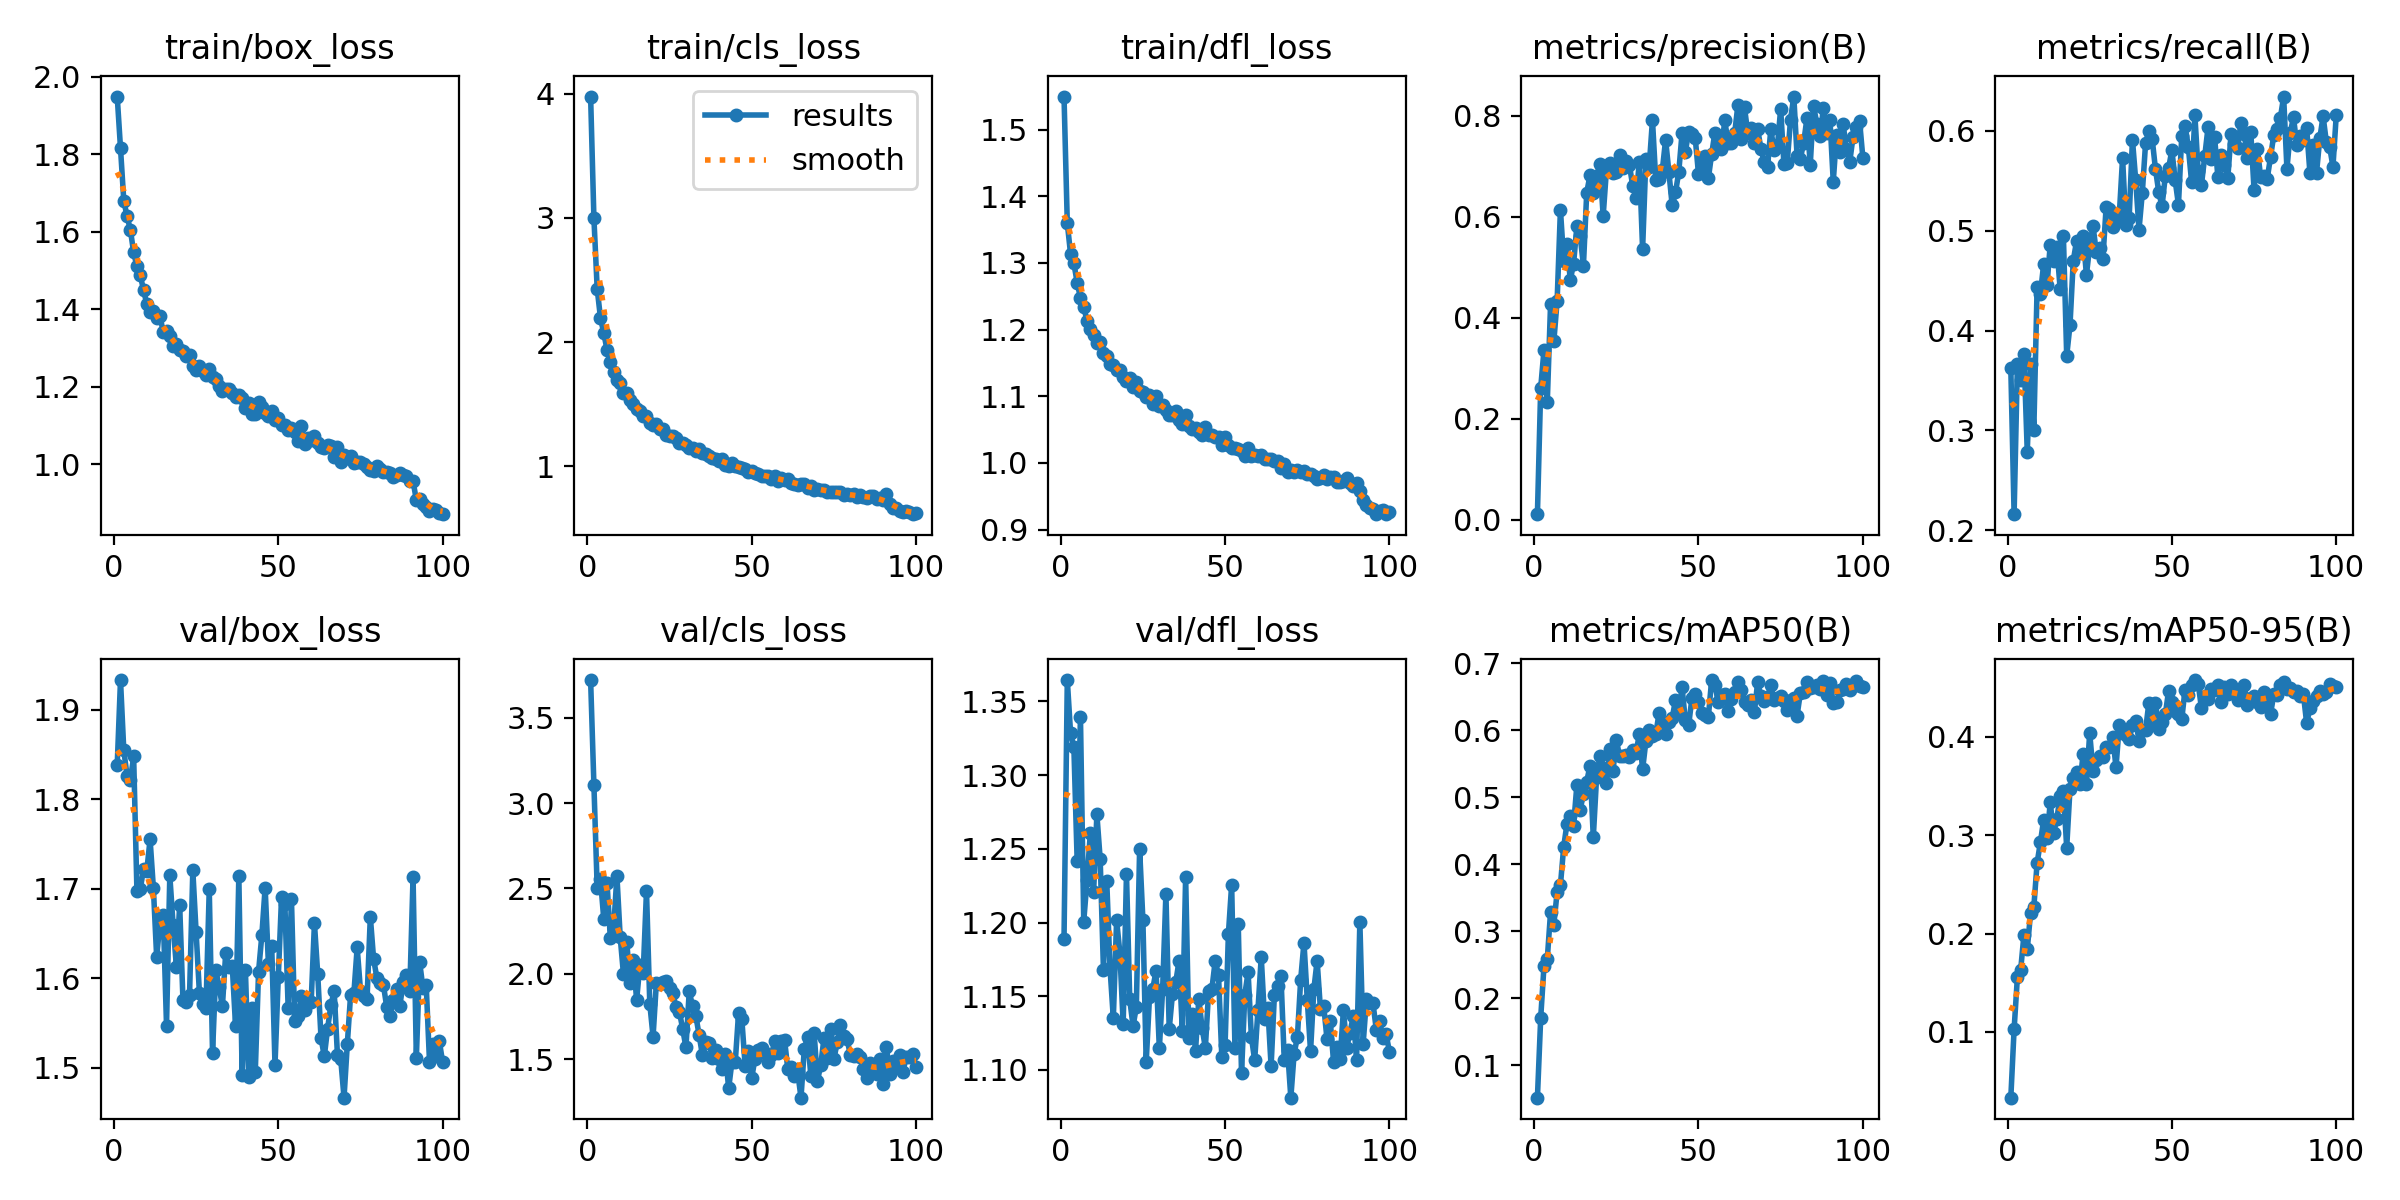

In [ ]:
# # we can also output some older school graphs if the tensor board isn't working for whatever reason...
# from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov8/yolov8_train/train2/results.png', width=1000)  # view results.png

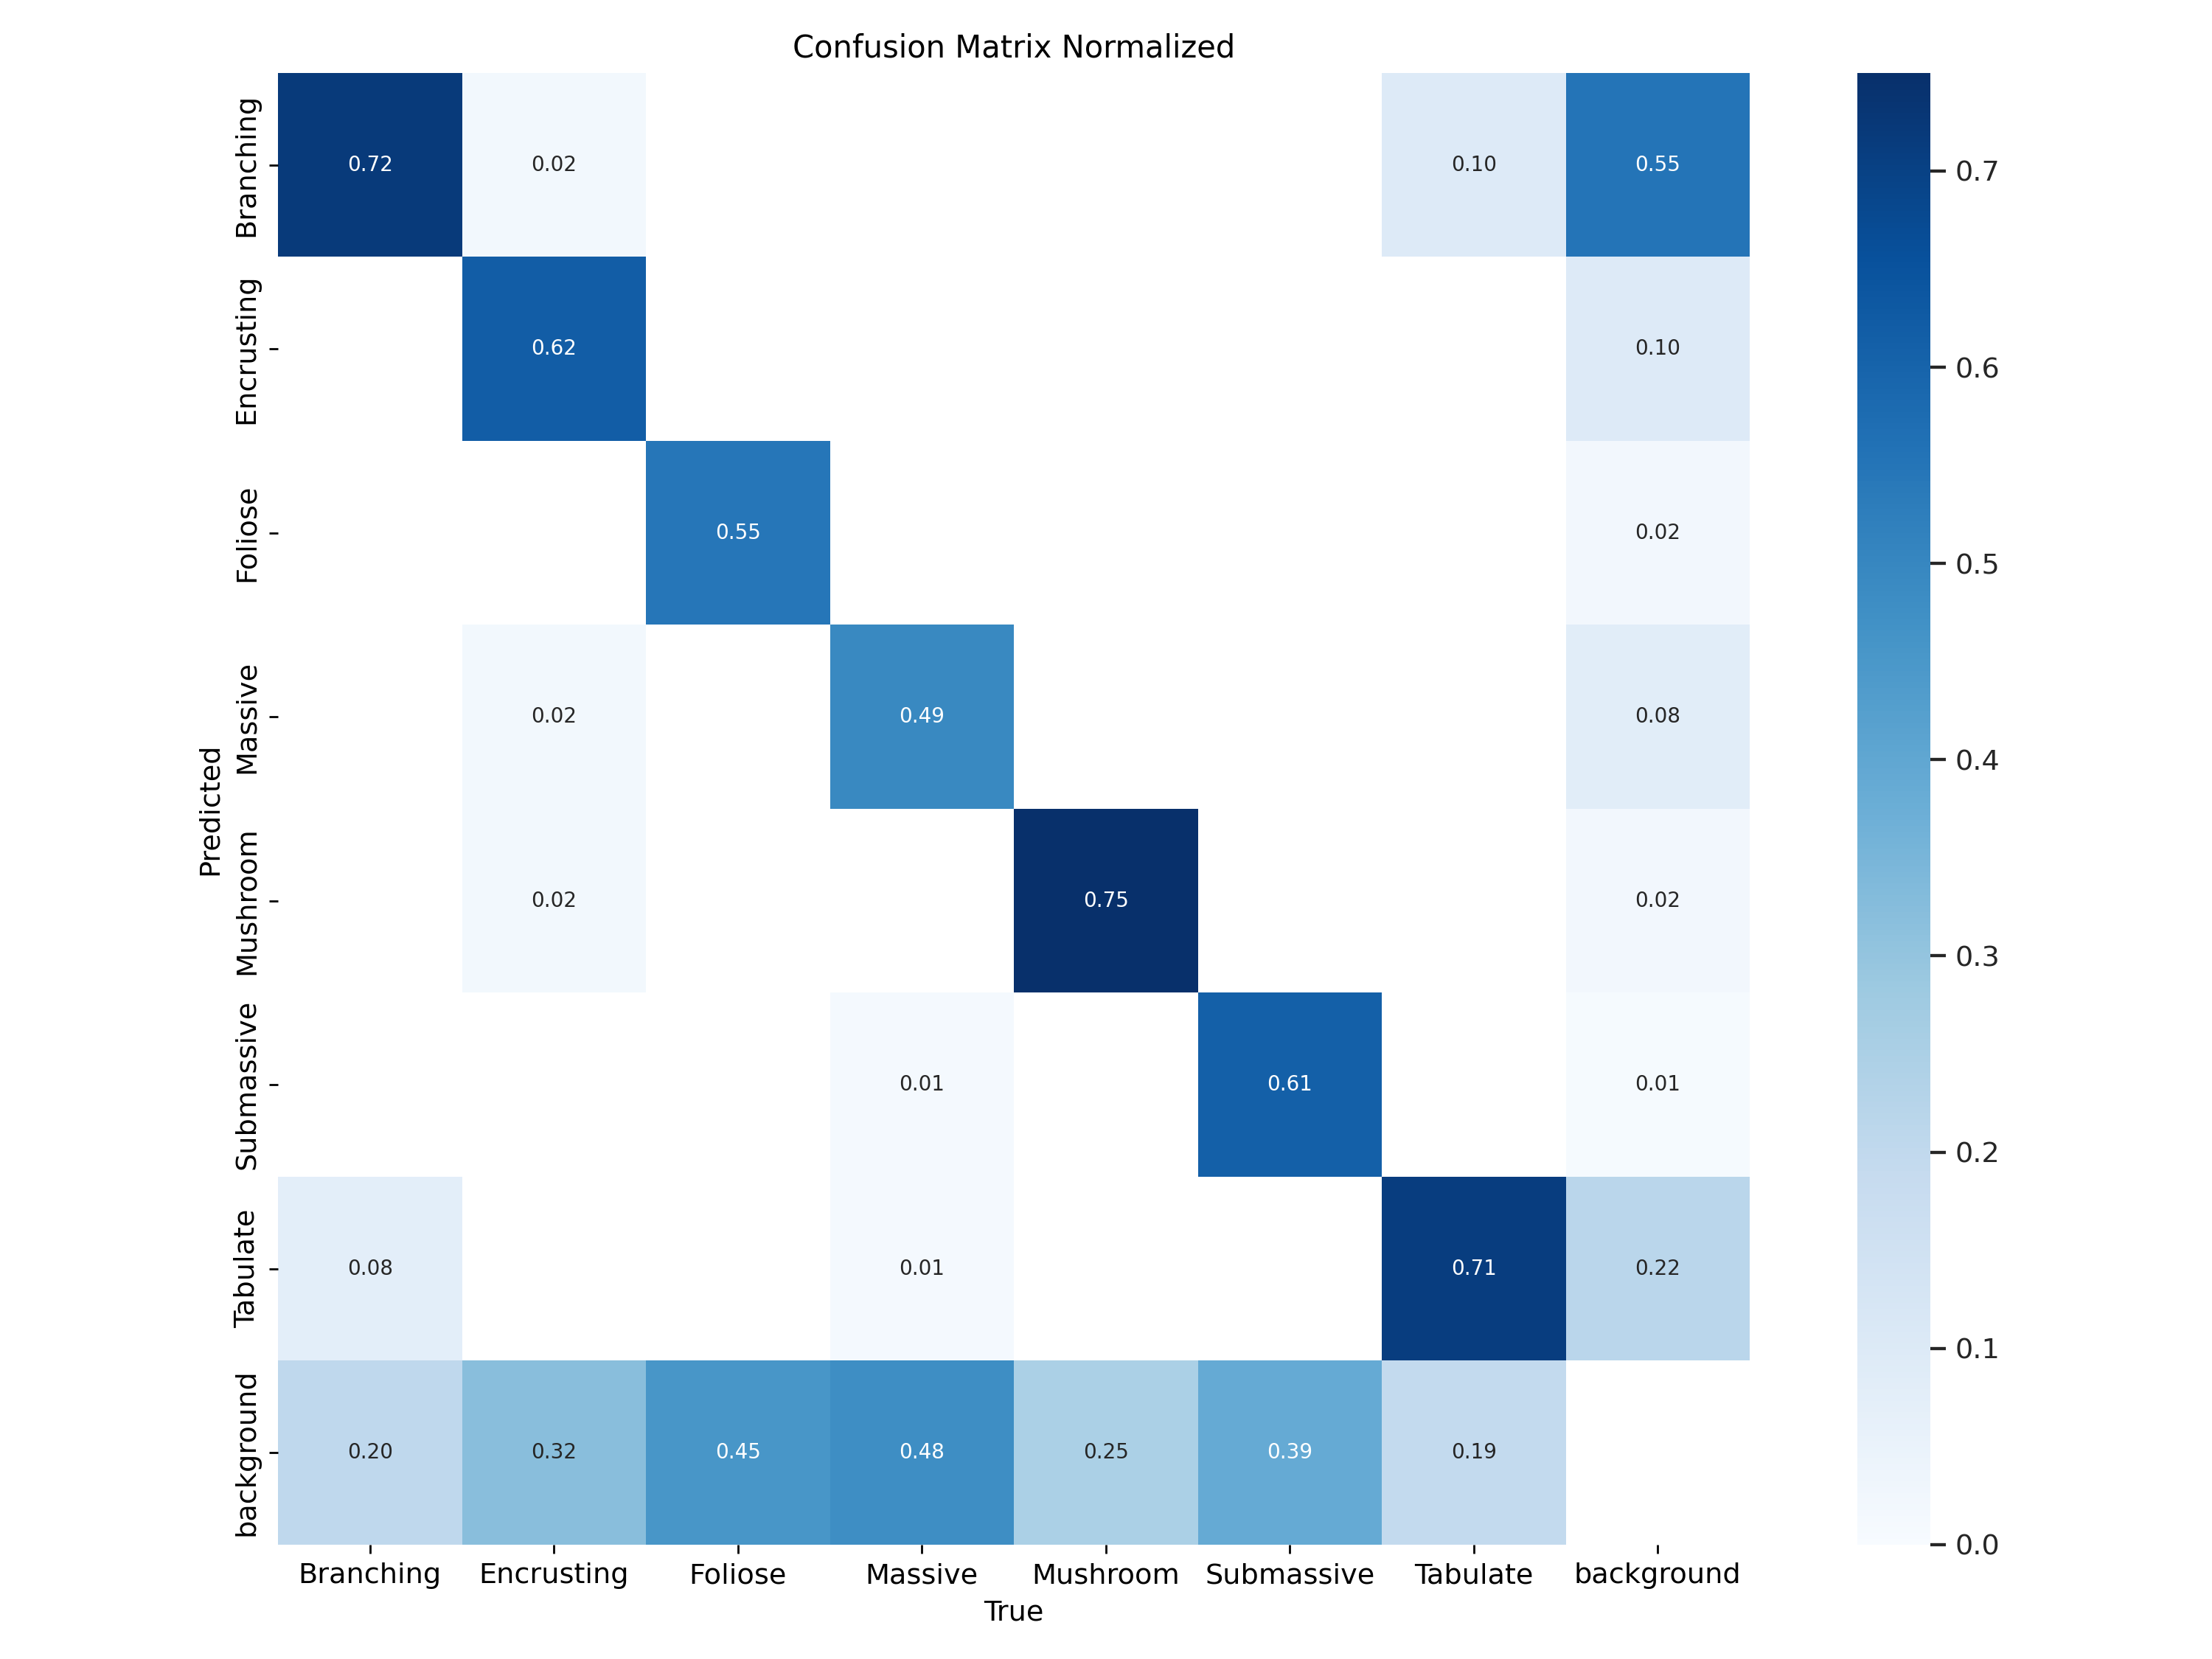

In [ ]:
#Confusion matrix is the chart that shows how the model handles different classes
Image(filename='/content/yolov8/yolov8_train/train2/confusion_matrix_normalized.png', width=1000)

### Visualize Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.


GROUND TRUTH TRAINING DATA:


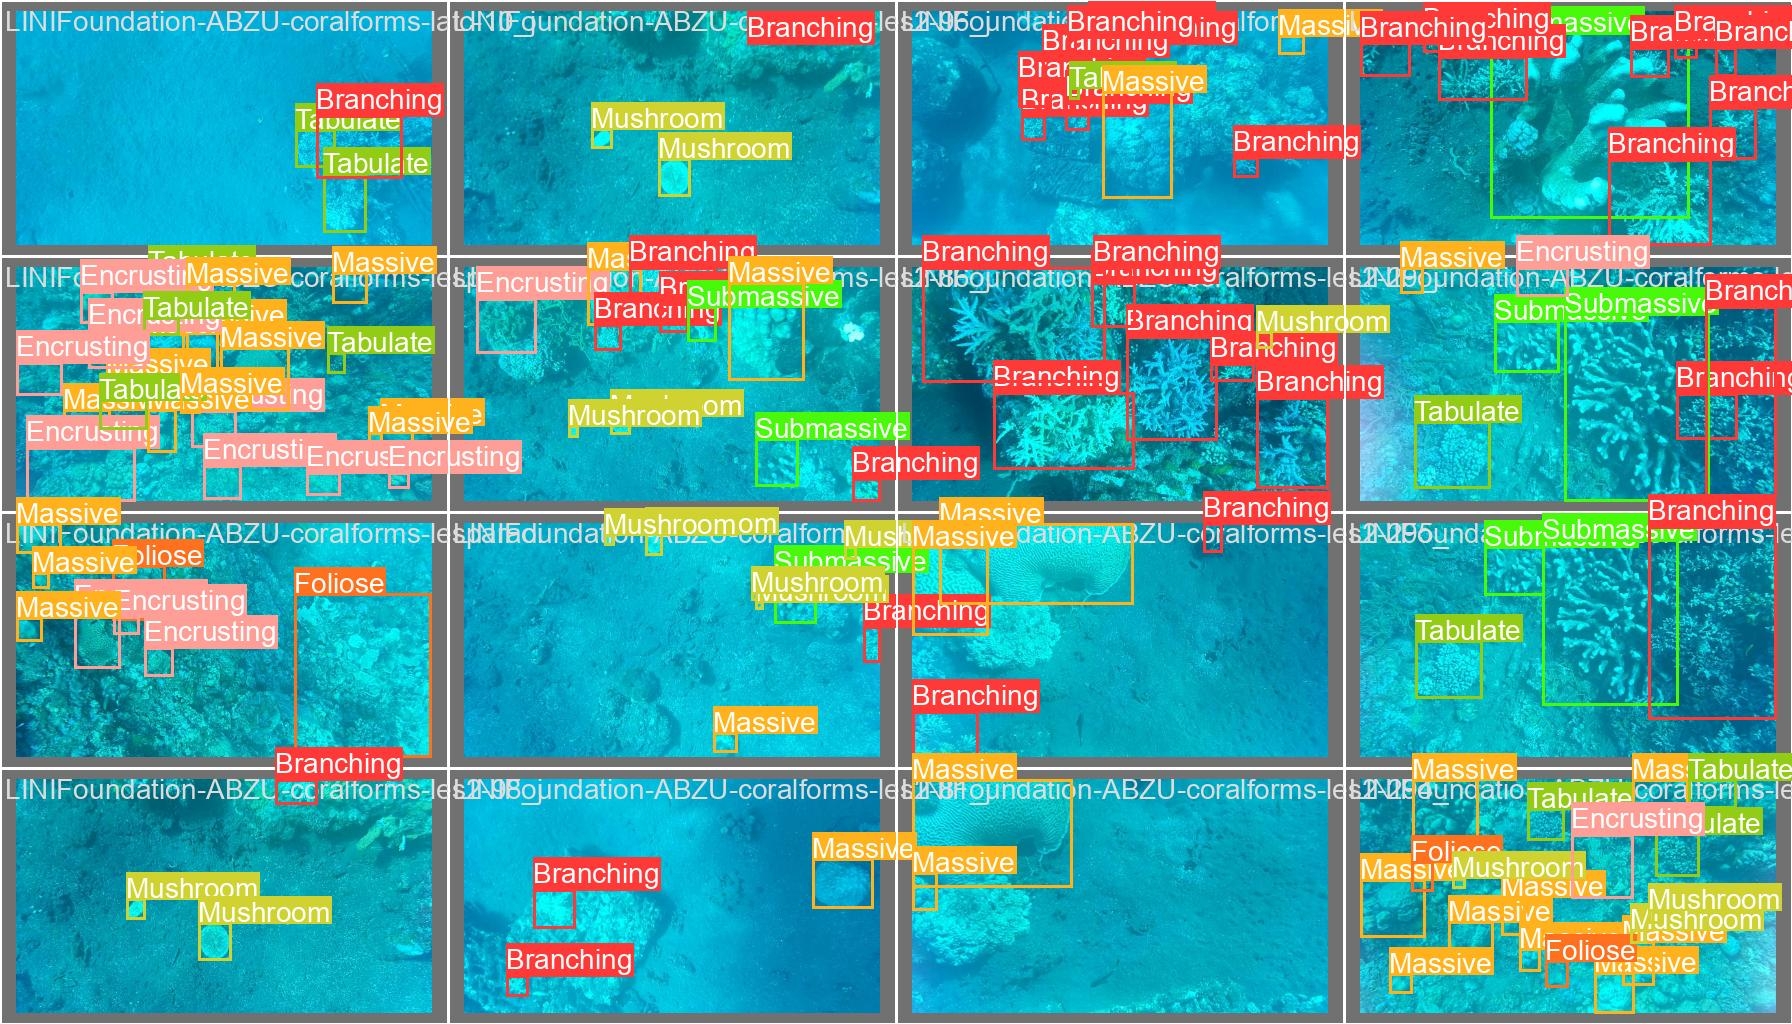

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov8/yolov8_train/train2/val_batch0_labels.jpg', width=1000)

GROUND TRUTH AUGMENTED TRAINING DATA:


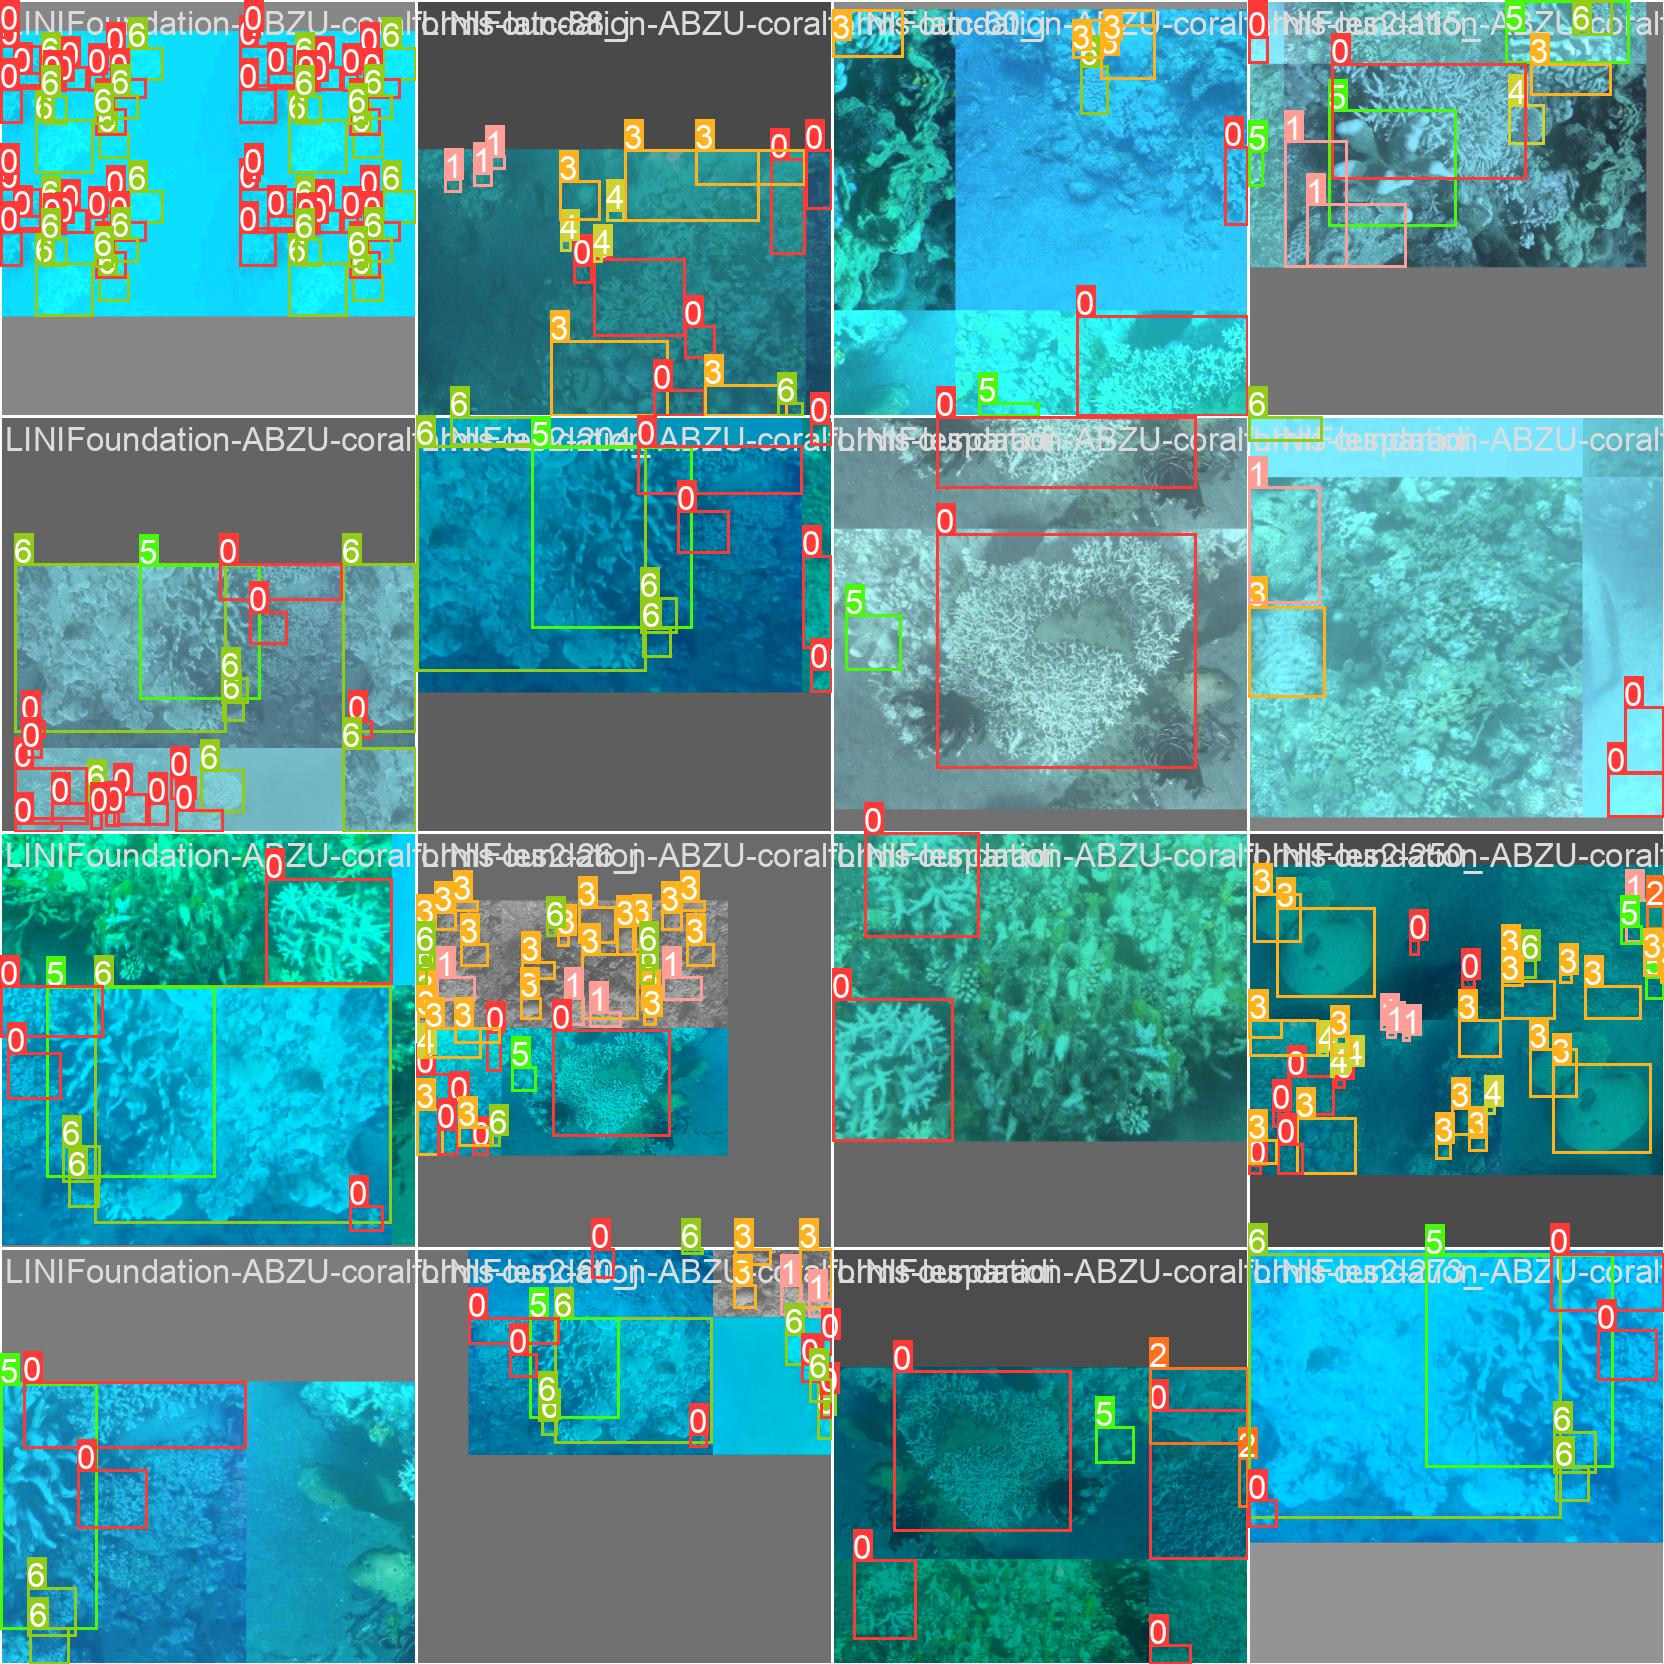

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov8/yolov8_train/train2/train_batch0.jpg', width=1000)

Validation Predict:


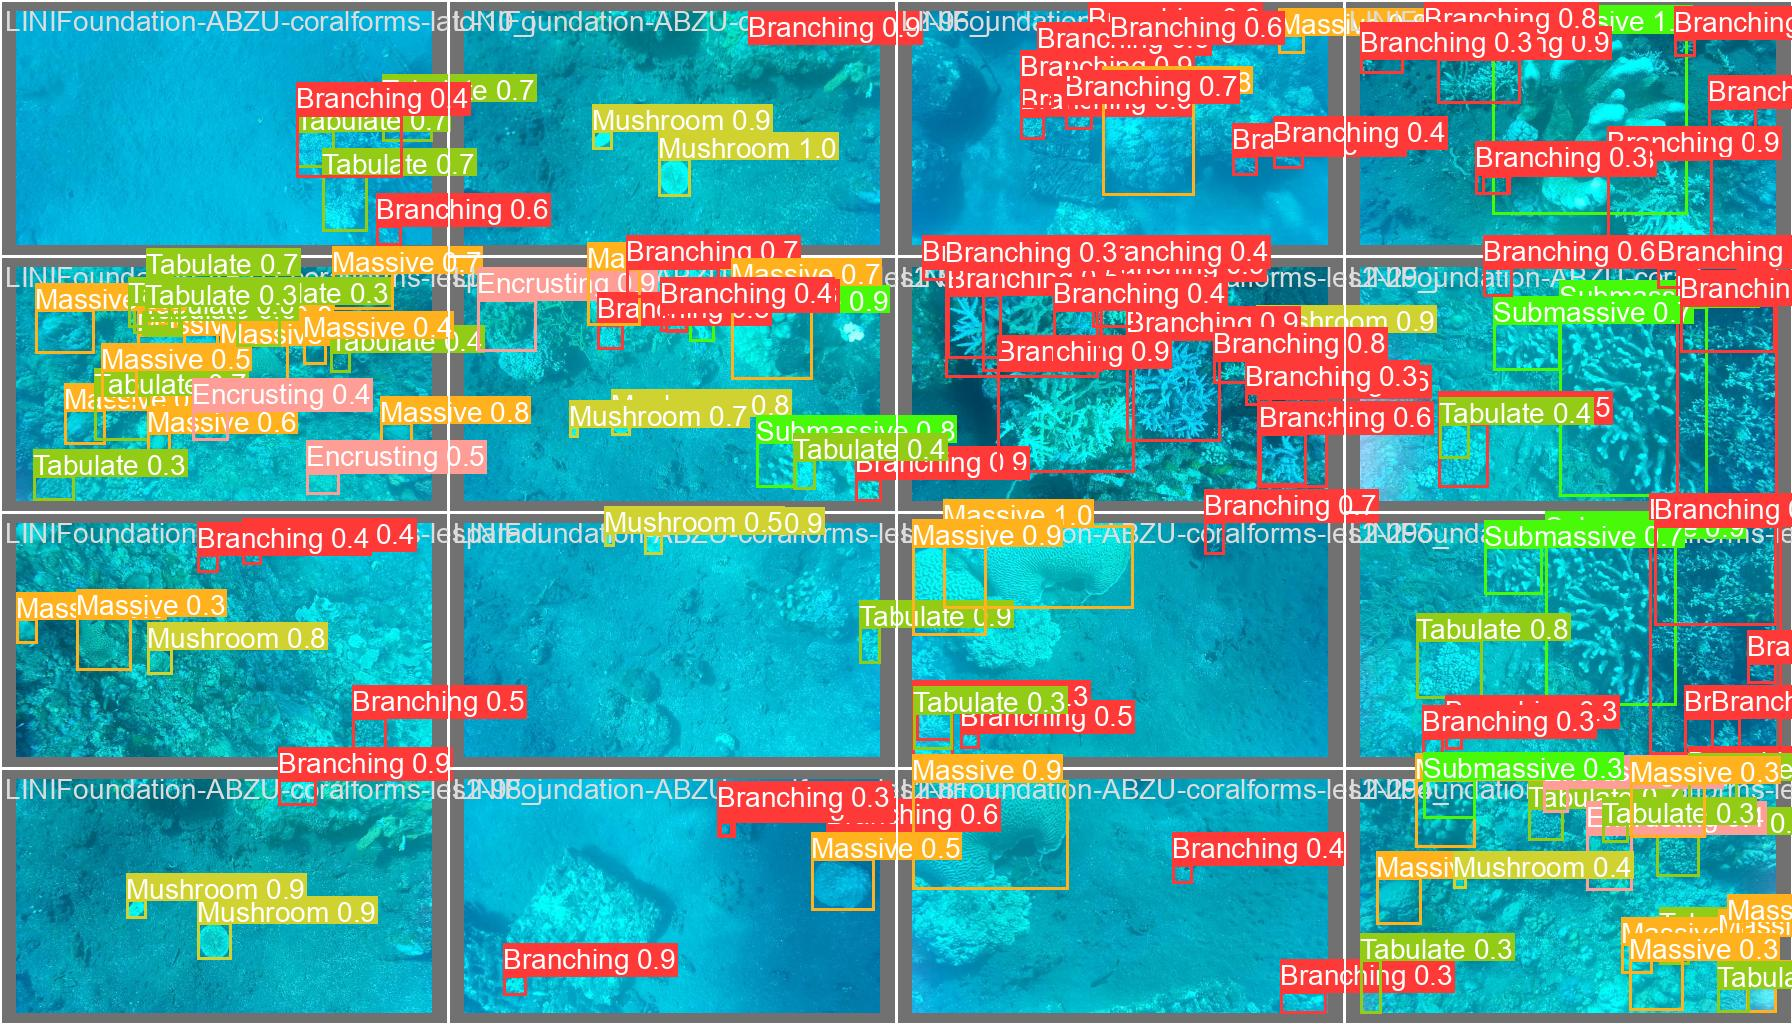

In [ ]:
# print out the prediction
print("Validation Predict:")
Image(filename='/content/yolov8/yolov8_train/train2/val_batch0_pred.jpg', width=1000)

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
# %cd /content/yolov5/
# !python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov

Streaming output truncated to the last 5000 lines.
video 1/1 (299/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.009s)
video 1/1 (300/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.009s)
video 1/1 (301/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.008s)
video 1/1 (302/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.009s)
video 1/1 (303/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.018s)
video 1/1 (304/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.012s)
video 1/1 (305/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.013s)
video 1/1 (306/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.011s)
video 1/1 (307/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 256x416 Done. (0.010s)
video 1/1 (308/5295) /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov: 25

In [ ]:
# %cp /content/yolov5/runs/detect/exp3/les2-1.mp4 /content/drive/MyDrive/AI_bootcamp

In [ ]:
%cp /content/yolov8/yolov8_train/train2/weights/best.pt /content/drive/MyDrive/cv_bootcamp_indonesiaai/final_project/models/yolov8n

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

# Inference Video

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

In [ ]:
# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/cv_bootcamp_indonesiaai/final_project/models/yolov8n/best.pt')
# model = YOLO('/content/drive/MyDrive/cv_bootcamp_indonesiaai/final_project/models/yolov3u/best.pt')

# Open the video file
video_path = "/content/drive/MyDrive/cv_bootcamp_indonesiaai/final_project/videos/raw-video.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties (width, height, frames per second)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can use other codecs like 'XVID' or 'MJPG'
output_path = "yolov8n-video.mp4"
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Write the annotated frame to the VideoWriter object
        out.write(annotated_frame)

        # Display the annotated frame
        # cv2.imshow("Annotated Frame", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object, VideoWriter object, and close the display window
cap.release()
out.release()
cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.
0: 256x416 7 Branchings, 6 Massives, 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 4 Branchings, 5 Massives, 9.7ms
Speed: 1.5ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 7 Branchings, 5 Massives, 9.1ms
Speed: 1.4ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 5 Branchings, 7 Massives, 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 8 Branchings, 9 Massives, 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 9 Branchings, 15 Massives, 9.4ms
Speed: 1.5ms preprocess, 9.4ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 5 Branchings, 11 Massives, 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 1.3ms postprocess per 